# CS446/546 - Class Session 13 - similarity and hierarchical clustering

In this class session we are going to hierachically cluster (based on Sorensen-Dice similarity) vertices in a directed graph from a landmark paper on human gene regulation (Neph et al., Cell, volume 150, pages 1274-1286, 2012; see PDF on Canvas)

Using Pandas `read_csv`, read in the ifle `shared/neph_gene_network.txt`, which has two columns of text (first column is the regulator gene, second column is the target gene), into a data frame. The file has no header and is tab-delimited.  Assign the column names of the dataframe to be `regulator` and `target`, respectively.

Let's load the Python packages that we will need for this exercise

In [19]:
import pandas
import igraph
import numpy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
import scipy.spatial.distance

Using `pandas.read_csv`, read the file `shared/neph_gene_network.txt`; name the two columns of the resulting data frame, `regulator` and `target`.

In [3]:
edge_list_neph = pandas.read_csv("shared/neph_gene_network.txt",
                                 sep="\t", 
                                 names=["regulator","target"])

Load the edge-list data into an undirected `igraph.Graph` object `neph_graph`, using `igraph.Graph.TupleList`. 

In [4]:
neph_graph = igraph.Graph.TupleList(edge_list_neph.values.tolist(), directed=False)
neph_graph.summary()

'IGRAPH UN-- 538 47945 -- \n+ attr: name (v)'

Using the igraph `Graph.similarity_dice()` method, compute a similarity matrix and assign it to name `S`

In [5]:
S = neph_graph.similarity_dice()

Using the `numpy.matrix` constructor, compute a distance matrix (1-S) and assign to object `D`

In [11]:
D = 1 - numpy.matrix(S)

Use scipy.spatial.distance.squareform to make a vector-form distance vector from the square-form distance matrix `D`; call the resulting object `vD`

In [29]:
vD = scipy.spatial.distance.squareform(D)

Using `scipy.cluster.hierarchy.linkage` on `vD` (with `method="average")`, perform hierarchical agglomerative clustering.  Assign the resulting object to name `hc`

In [30]:
hc = scipy.cluster.hierarchy.linkage(vD, method="average")

Plot a dendrogram using `scipy.cluster.hierarchy.dendrogram`

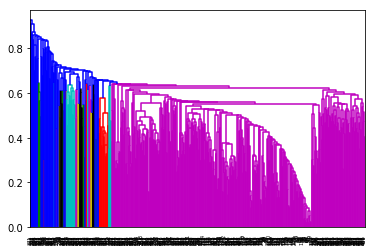

In [31]:
plt.figure()
scipy.cluster.hierarchy.dendrogram(hc)
plt.show()